Dane wczytane pomyślnie.

Rozmiar zbioru treningowego: 159 obserwacji (od 2011-01 do 2024-03)
Rozmiar zbioru testowego: 12 obserwacji (od 2024-04 do 2025-03)

--- Prognozy z modeli ARIMA ---

Estymacja i prognoza dla ARIMA(4,1,3)...
Prognoza dla ARIMA(4,1,3):
Data
2024-04-01    2.647052e+06
2024-05-01    2.873445e+06
2024-06-01    2.971217e+06
2024-07-01    2.995722e+06
2024-08-01    3.008179e+06
2024-09-01    2.946971e+06
2024-10-01    2.861348e+06
2024-11-01    2.826656e+06
2024-12-01    2.800887e+06
2025-01-01    2.778940e+06
2025-02-01    2.799671e+06
2025-03-01    2.827616e+06
Freq: MS, Name: predicted_mean, dtype: float64
Metryki dla ARIMA(4,1,3): MSE=558662186296.43, MAE=521350.10
Ljung-Box p-value (lag 10) dla reszt ARIMA(4,1,3): 0.2951

Estymacja i prognoza dla ARIMA(5,1,4)...


/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)

Prognoza dla ARIMA(5,1,4):
Data
2024-04-01    2.868955e+06
2024-05-01    3.234009e+06
2024-06-01    3.447182e+06
2024-07-01    3.501221e+06
2024-08-01    3.317683e+06
2024-09-01    2.990337e+06
2024-10-01    2.622404e+06
2024-11-01    2.260537e+06
2024-12-01    2.041895e+06
2025-01-01    2.007320e+06
2025-02-01    2.132568e+06
2025-03-01    2.418798e+06
Freq: MS, Name: predicted_mean, dtype: float64
Metryki dla ARIMA(5,1,4): MSE=480715277172.00, MAE=609743.13
Ljung-Box p-value (lag 10) dla reszt ARIMA(5,1,4): 0.0000

Estymacja i prognoza dla ARIMA(3,1,4)...
Prognoza dla ARIMA(3,1,4):
Data
2024-04-01    2.568049e+06
2024-05-01    2.717871e+06
2024-06-01    2.741911e+06
2024-07-01    2.749471e+06
2024-08-01    2.729288e+06
2024-09-01    2.713344e+06
2024-10-01    2.701512e+06
2024-11-01    2.697137e+06
2024-12-01    2.696707e+06
2025-01-01    2.698288e+06
2025-02-01    2.699974e+06
2025-03-01    2.701136e+06
Freq: MS, Name: predicted_mean, dtype: float64
Metryki dla ARIMA(3,1,4): MSE=807

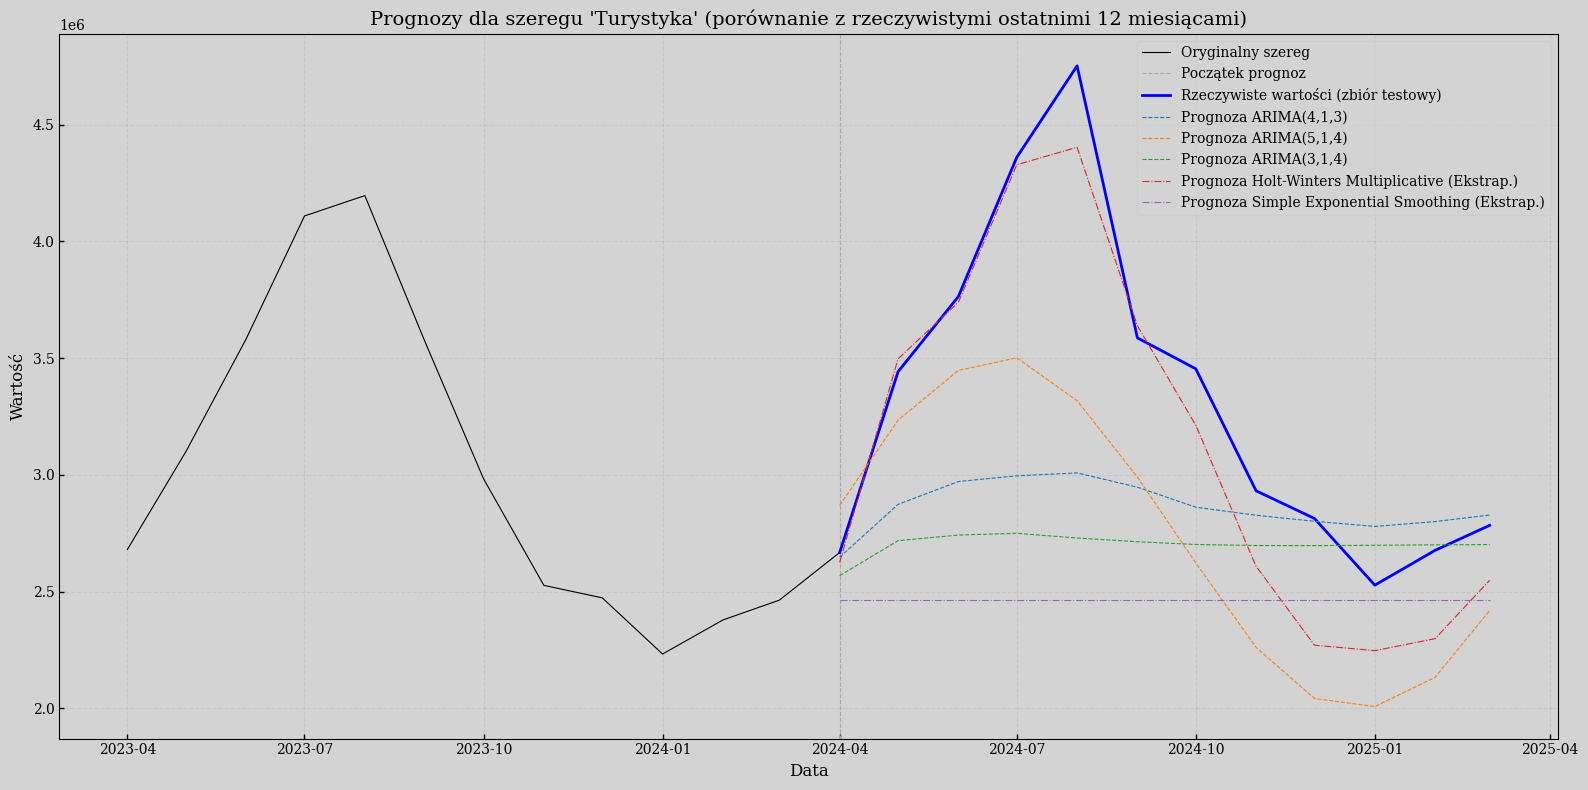

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Styl wykresów ---
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman', 'DejaVu Serif', 'Arial'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 0.8,
    'lines.markersize': 6,
    'scatter.edgecolors': 'black',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'grid.linestyle': '--',
    'grid.color': '#aaaaaa',
    'grid.alpha': 0.3,
    'figure.figsize': (14, 7),
    'figure.facecolor': 'lightgrey',
    'axes.facecolor': 'lightgrey'
})

# --- Wczytanie danych ---------------------------------------------------
file_path = "turystyka_czasowe_2.xlsx"
try:
    df = pd.read_excel(file_path)
    if "Data" in df.columns:
        df["Data"] = pd.to_datetime(df["Data"])
        y_full = df.set_index("Data")["Wartosc"].dropna() # Pełny szereg do wizualizacji
        y_full = y_full.asfreq("MS")
    else:
        y_full = df["Wartosc"].dropna()
        print("Brak kolumny 'Data'. Szereg czasowy nie ma indeksu daty. Upewnij się, że dane są uporządkowane czasowo.")
    print("Dane wczytane pomyślnie.")
except FileNotFoundError:
    print(f"Błąd: Plik '{file_path}' nie został znaleziony. Upewnij się, że plik jest w katalogu lub podaj pełną ścieżkę.")
    exit()
except KeyError:
    print("Błąd: Kolumna 'Wartosc' nie została znaleziona w pliku.")
    exit()

# --- Podział danych na zbiory treningowe i testowe -----------------------------------
# Prognozujemy ostatnie 12 miesięcy
forecast_horizon_months = 12 

if len(y_full) <= forecast_horizon_months:
    print(f"Błąd: Szereg jest za krótki ({len(y_full)} obserwacji) by utworzyć zbiór testowy o długości {forecast_horizon_months} miesięcy.")
    exit()

# Szereg do trenowania modeli (wszystkie dane oprócz ostatnich 12 miesięcy)
y_train = y_full.iloc[:-forecast_horizon_months]
# Szereg do porównania prognoz (ostatnie 12 miesięcy z y_full)
y_test = y_full.iloc[-forecast_horizon_months:]

print(f"\nRozmiar zbioru treningowego: {len(y_train)} obserwacji (od {y_train.index.min().strftime('%Y-%m')} do {y_train.index.max().strftime('%Y-%m')})")
print(f"Rozmiar zbioru testowego: {len(y_test)} obserwacji (od {y_test.index.min().strftime('%Y-%m')} do {y_test.index.max().strftime('%Y-%m')})")


# --- Dekompozycja szeregu (STL) dla wizualizacji (na pełnym szeregu) ---
try:
    if (y_full > 0).all():
        stl_result_for_plot = STL(y_full, period=12, robust=True).fit()
        y_sa_for_plot = y_full - stl_result_for_plot.seasonal
        y_trend_for_plot = stl_result_for_plot.trend
    else:
        print("Szereg zawiera wartości zerowe lub ujemne, nie można użyć STL z multiplikatywnością dla wizualizacji.")
        y_sa_for_plot = y_full
        y_trend_for_plot = pd.Series(np.nan, index=y_full.index)
except Exception as e:
    print(f"Błąd podczas dekompozycji STL dla wizualizacji: {e}")
    print("Upewnij się, że szereg 'y_full' jest wystarczająco długi i ma prawidłową częstotliwość dla STL.")
    plt.figure(figsize=(14, 6))
    plt.plot(y_full, label="Wartość (oryginalna)", color="blue")
    plt.title("Oryginalny szereg (dekompozycja STL nie powiodła się)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Modele ARIMA i prognozy (na oryginalnym szeregu 'y_train') -------------------
print("\n--- Prognozy z modeli ARIMA ---")

arima_models_to_forecast = [
    (4,1,3), (5,1,4), (3,1,4)
]

arima_forecast_results = {}
arima_metrics = {}

for p, d, q in arima_models_to_forecast:
    model_name = f"ARIMA({p},{d},{q})"
    print(f"\nEstymacja i prognoza dla {model_name}...")
    try:
        # Dopasowujemy model do szeregu treningowego
        model = ARIMA(y_train, order=(p, d, q)).fit()
        
        # Generujemy prognozę na okres y_test
        forecast_arima_raw = model.forecast(steps=forecast_horizon_months)
        forecast_arima_raw.index = y_test.index # Upewniamy się, że indeks prognozy odpowiada y_test

        arima_forecast_results[model_name] = forecast_arima_raw
        print(f"Prognoza dla {model_name}:\n{forecast_arima_raw}")

        # Obliczanie metryk
        mse = mean_squared_error(y_test, forecast_arima_raw)
        mae = mean_absolute_error(y_test, forecast_arima_raw)
        arima_metrics[model_name] = {"MSE": mse, "MAE": mae}
        print(f"Metryki dla {model_name}: MSE={mse:.2f}, MAE={mae:.2f}")

        ljung_box_results = acorr_ljungbox(model.resid, lags=[10], return_df=True)
        print(f"Ljung-Box p-value (lag 10) dla reszt {model_name}: {ljung_box_results['lb_pvalue'].values[0]:.4f}")

    except Exception as e:
        print(f"Błąd podczas estymacji lub prognozy dla {model_name}: {e}")

# --- Prognozy z modeli ekstrapolacyjnych (na oryginalnym szeregu 'y_train') -----------
print("\n--- Prognozy z modeli ekstrapolacyjnych ---")

exponential_smoothing_forecasts = {}
exponential_smoothing_metrics = {}

if (y_train > 0).all(): # Sprawdzamy y_train dla multiplikatywności
    try:
        # Dopasowujemy model do skróconego szeregu treningowego
        fit_hw_mul = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul', initialization_method="estimated").fit()
        forecast_hw_mul = fit_hw_mul.forecast(forecast_horizon_months)
        forecast_hw_mul.index = y_test.index # Upewniamy się, że indeks prognozy odpowiada y_test
        
        exponential_smoothing_forecasts["Holt-Winters Multiplicative"] = forecast_hw_mul
        print("\nPrognoza Holt-Winters Multiplicative:")
        print(forecast_hw_mul)

        # Obliczanie metryk
        mse = mean_squared_error(y_test, forecast_hw_mul)
        mae = mean_absolute_error(y_test, forecast_hw_mul)
        exponential_smoothing_metrics["Holt-Winters Multiplicative"] = {"MSE": mse, "MAE": mae}
        print(f"Metryki dla Holt-Winters Multiplicative: MSE={mse:.2f}, MAE={mae:.2f}")

    except Exception as e:
        print(f"Błąd dla Holt-Winters Multiplicative: {e}")
else:
    print("\nPominięto Holt-Winters Multiplicative: Szereg treningowy zawiera wartości zerowe lub ujemne.")

try:
    # Dopasowujemy model do skróconego szeregu treningowego
    fit_ses = SimpleExpSmoothing(y_train, initialization_method="estimated").fit()
    forecast_ses = fit_ses.forecast(forecast_horizon_months)
    forecast_ses.index = y_test.index # Upewniamy się, że indeks prognozy odpowiada y_test

    exponential_smoothing_forecasts["Simple Exponential Smoothing"] = forecast_ses
    print("\nPrognoza Simple Exponential Smoothing:")
    print(forecast_ses)

    # Obliczanie metryk
    mse = mean_squared_error(y_test, forecast_ses)
    mae = mean_absolute_error(y_test, forecast_ses)
    exponential_smoothing_metrics["Simple Exponential Smoothing"] = {"MSE": mse, "MAE": mae}
    print(f"Metryki dla Simple Exponential Smoothing: MSE={mse:.2f}, MAE={mae:.2f}")

except Exception as e:
    print(f"Błąd dla Simple Exponential Smoothing: {e}")

# --- Podsumowanie metryk ---
print("\n--- Podsumowanie metryk (MSE i MAE) dla wszystkich modeli ---")
print("Modele ARIMA:")
for model_name, metrics in arima_metrics.items():
    print(f"  {model_name}: MSE={metrics['MSE']:.2f}, MAE={metrics['MAE']:.2f}")

print("\nModele ekstrapolacyjne:")
for model_name, metrics in exponential_smoothing_metrics.items():
    print(f"  {model_name}: MSE={metrics['MSE']:.2f}, MAE={metrics['MAE']:.2f}")


# --- Wizualizacja prognoz (pokazanie ostatni 24 miesiące historii i prognoz) ---
plt.figure(figsize=(16, 8))

# Określamy początek wyświetlanego zakresu na wykresie
# Chcemy pokazać kawałek zbioru treningowego i cały zbiór testowy
display_start_index = max(0, len(y_full) - 24) # np. ostatnie 24 miesiące, żeby było widać trochę danych treningowych przed prognozą
y_display_range = y_full.iloc[display_start_index:]

# Rysujemy ograniczony zakres oryginalnego szeregu
plt.plot(y_display_range, label="Oryginalny szereg", color="black", linestyle='-')

# Rysujemy linię pionową oznaczającą początek prognozy (koniec zbioru treningowego)
forecast_start_date = y_train.index[-1] + pd.DateOffset(months=1)
plt.axvline(forecast_start_date, color='darkgrey', linestyle='--', label='Początek prognoz')

# Rysujemy rzeczywiste wartości z okresu testowego
plt.plot(y_test, label="Rzeczywiste wartości (zbiór testowy)", color="blue", linestyle='-', linewidth=2)


# Prognozy ARIMA
for model_name, forecast_data in arima_forecast_results.items():
    plt.plot(forecast_data, label=f"Prognoza {model_name}", linestyle='--')

# Prognozy ekstrapolacyjne
for model_name, forecast_data in exponential_smoothing_forecasts.items():
    plt.plot(forecast_data, label=f"Prognoza {model_name} (Ekstrap.)", linestyle='-.')

plt.title(f"Prognozy dla szeregu 'Turystyka' (porównanie z rzeczywistymi ostatnimi {forecast_horizon_months} miesiącami)")
plt.xlabel("Data")
plt.ylabel("Wartość")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import STL

# Załaduj dane i przygotuj szereg
df = pd.read_excel("turystyka_czasowe_2.xlsx")
df["Data"] = pd.to_datetime(df["Data"])
df.set_index("Data", inplace=True)
y = df["Wartosc"].dropna().asfreq("MS")
y_log = np.log(y).replace([np.inf, -np.inf], np.nan).dropna()

# STL – odsezonowanie
stl = STL(y_log, period=12, robust=True).fit()
y_log_sa = y_log - stl.seasonal

# Modele do estymacji na podstawie analizy ACF/PACF
models_to_estimate = [(0, 1, 1), (1, 1, 1), (2, 1, 0), (3, 1, 1)]

results = []

for order in models_to_estimate:
    try:
        model = ARIMA(y_log_sa, order=order).fit()
        ljung_pval = acorr_ljungbox(model.resid, lags=[10], return_df=True)["lb_pvalue"].values[0]

        results.append({
            "model": f"ARIMA{order}",
            "AIC": model.aic,
            "BIC": model.bic,
            "HQC": model.hqic,
            "LB_p(10)": ljung_pval,
            "logLik": model.llf
        })

    except Exception as e:
        print(f"Błąd dla ARIMA{order}: {e}")

# Zapisz do DataFrame i posortuj
df_results = pd.DataFrame(results)
df_results = df_results.sort_values("AIC").reset_index(drop=True)

# Wyświetl tabelę wyników
print(df_results.to_string(index=False))


         model       AIC       BIC       HQC  LB_p(10)     logLik
ARIMA(3, 1, 1) 33.724718 49.403710 40.087071       1.0 -11.862359
ARIMA(2, 1, 0) 45.924103 55.331499 49.741515       1.0 -19.962052
ARIMA(1, 1, 1) 48.119112 57.526507 51.936524       1.0 -21.059556
ARIMA(0, 1, 1) 52.798060 59.069657 55.343001       1.0 -24.399030


Dane wczytane pomyślnie.


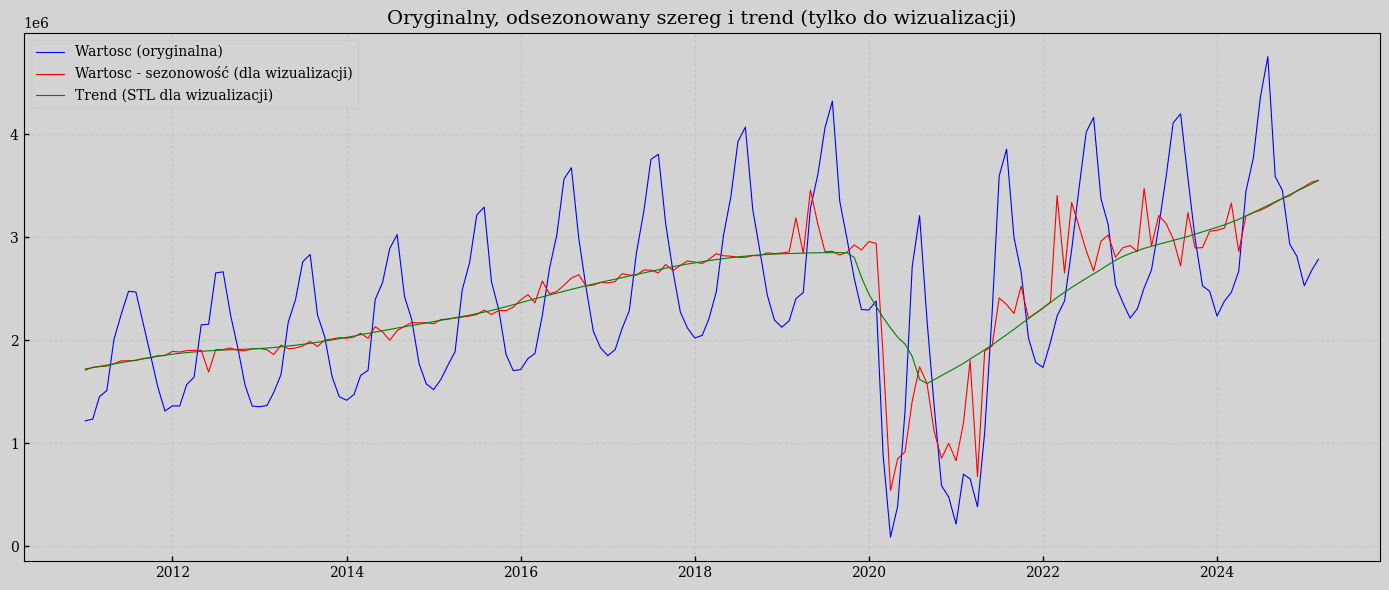


--- Prognozy z modeli ARIMA ---

Estymacja i prognoza dla ARIMA(3,1,3)...
Prognoza dla ARIMA(3,1,3):
2025-01-01    2.769928e+06
2025-02-01    2.913388e+06
2025-03-01    3.247045e+06
2025-04-01    3.678517e+06
2025-05-01    4.093012e+06
2025-06-01    4.384227e+06
Freq: MS, Name: predicted_mean, dtype: float64
Ljung-Box p-value (lag 10) dla reszt ARIMA(3,1,3): 0.0000

Estymacja i prognoza dla ARIMA(2,1,2)...
Prognoza dla ARIMA(2,1,2):
2025-01-01    2.709269e+06
2025-02-01    2.835433e+06
2025-03-01    3.152381e+06
2025-04-01    3.572526e+06
2025-05-01    3.983714e+06
2025-06-01    4.279085e+06
Freq: MS, Name: predicted_mean, dtype: float64
Ljung-Box p-value (lag 10) dla reszt ARIMA(2,1,2): 0.0000

Estymacja i prognoza dla ARIMA(1,1,2)...
Prognoza dla ARIMA(1,1,2):
2025-01-01    2.696908e+06
2025-02-01    2.645286e+06
2025-03-01    2.634955e+06
2025-04-01    2.632888e+06
2025-05-01    2.632474e+06
2025-06-01    2.632392e+06
Freq: MS, Name: predicted_mean, dtype: float64
Ljung-Box p-value

/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarni

Prognoza dla ARIMA(4,1,4):
2025-01-01    2.627256e+06
2025-02-01    2.646368e+06
2025-03-01    3.094954e+06
2025-04-01    3.612849e+06
2025-05-01    3.936521e+06
2025-06-01    4.214769e+06
Freq: MS, Name: predicted_mean, dtype: float64
Ljung-Box p-value (lag 10) dla reszt ARIMA(4,1,4): 0.0000

--- Prognozy z modeli ekstrapolacyjnych ---

Prognoza Holt-Winters Multiplicative:
2025-01-01    2.781106e+06
2025-02-01    2.843388e+06
2025-03-01    3.150997e+06
Freq: MS, dtype: float64

Prognoza Simple Exponential Smoothing:
2025-01-01    2.813415e+06
2025-02-01    2.813415e+06
2025-03-01    2.813415e+06
Freq: MS, dtype: float64

--- Tabela Błędów prognoz ---
                                        MAE           MSE
Model                                                    
ARIMA(3,1,3)                  314315.322216  1.099300e+11
ARIMA(2,1,2)                  236556.026814  6.479863e+10
ARIMA(1,1,2)                  116485.744831  1.727198e+10
ARIMA(2,2,2)                  148642.197248  3.40

/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


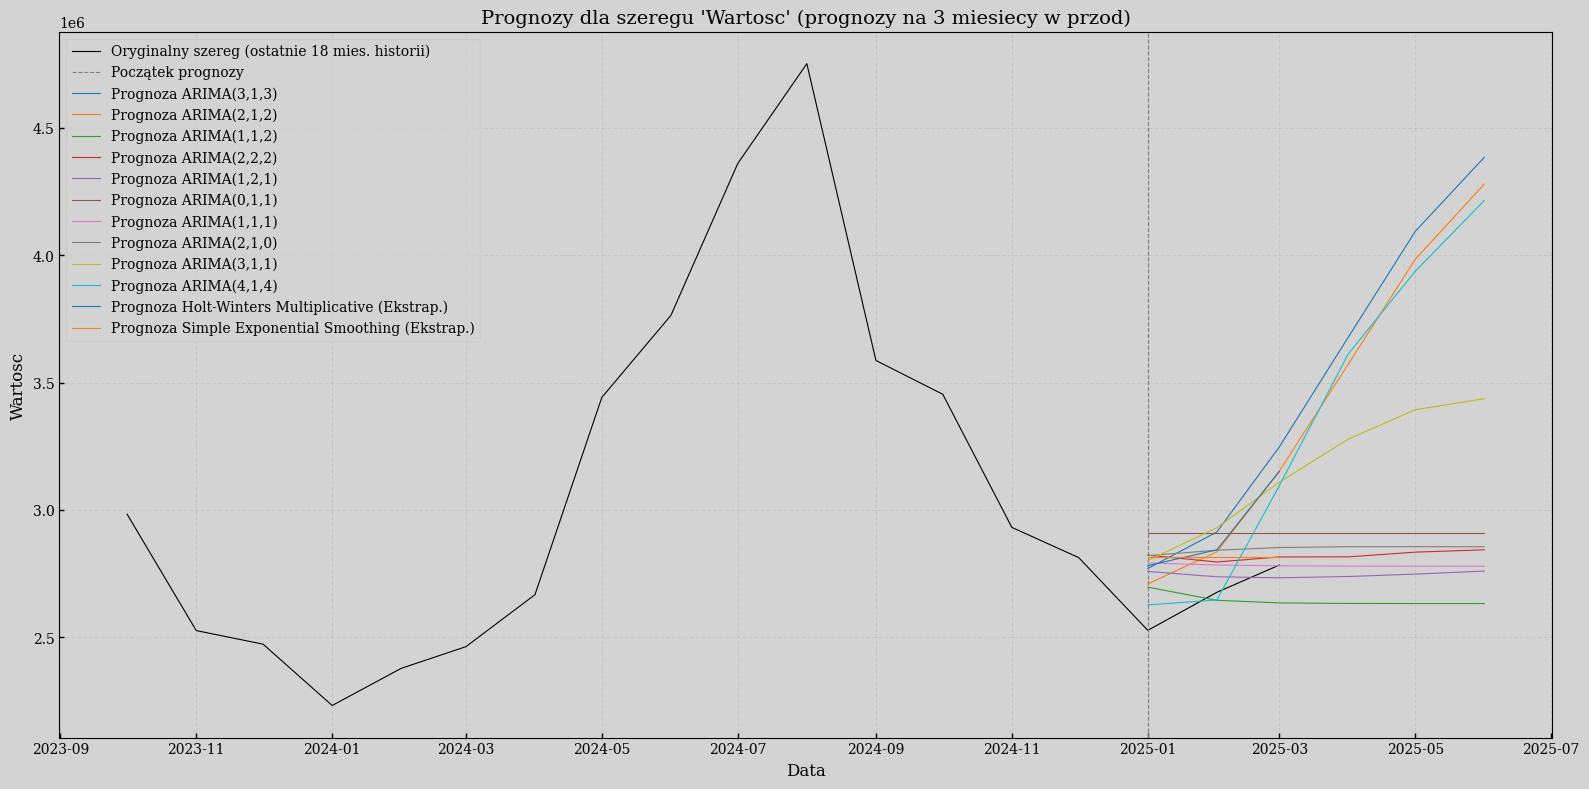

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import MAE i MSE

# --- Styl wykresów ---
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman', 'DejaVu Serif', 'Arial'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 0.8,
    'lines.markersize': 6,
    'scatter.edgecolors': 'black',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'grid.linestyle': '--',
    'grid.color': '#aaaaaa',
    'grid.alpha': 0.3,
    'figure.figsize': (14, 7),
    'figure.facecolor': 'lightgrey',
    'axes.facecolor': 'lightgrey'
})

# --- Wczytanie danych ---------------------------------------------------
# Pamiętaj, aby plik 'bezrobocie_czasowe.xlsx' znajdował się w tym samym katalogu co skrypt
# lub podaj pełną ścieżkę do pliku.
file_path = "turystyka_czasowe_2.xlsx"
try:
    df = pd.read_excel(file_path)
    if "Data" in df.columns:
        df["Data"] = pd.to_datetime(df["Data"])
        y_full = df.set_index("Data")["Wartosc"].dropna() # Pełny szereg do wizualizacji
        y_full = y_full.asfreq("MS")
    else:
        y_full = df["Wartosc"].dropna()
        print("Brak kolumny 'Data'. Szereg czasowy nie ma indeksu daty. Upewnij się, że dane są uporządkowane czasowo.")
    print("Dane wczytane pomyślnie.")
except FileNotFoundError:
    print(f"Błąd: Plik '{file_path}' nie został znaleziony. Upewnij się, że plik jest w katalogu lub podaj pełną ścieżkę.")
    exit()
except KeyError:
    print("Błąd: Kolumna 'Wartosc' nie została znaleziona w pliku.")
    exit()
except Exception as e:
    print(f"Ogólny błąd podczas wczytywania pliku: {e}. Sprawdź, czy plik jest poprawnie sformatowany i nazwany.")
    exit()


# Określenie punktu podziału dla prognozy "in-sample"
# Prognoza ma zacząć się 12 miesięcy wcześniej
forecast_start_offset_months = 3
if len(y_full) <= forecast_start_offset_months:
    print(f"Błąd: Szereg jest za krótki ({len(y_full)} obserwacji) by rozpocząć prognozę {forecast_start_offset_months} miesięcy wcześniej.")
    exit()

# Szereg do trenowania modeli (bez ostatnich 12 miesięcy)
y_train = y_full.iloc[:-forecast_start_offset_months]
# Szereg do porównania prognoz (ostatnie 12 miesięcy, czyli dane historyczne wykorzystane do oceny prognoz)
y_validation_and_future = y_full.iloc[-forecast_start_offset_months:]


# --- Dekompozycja szeregu (STL) dla wizualizacji (nie do modelowania ARIMA) ---
try:
    # Sprawdzenie, czy wszystkie wartości są dodatnie, aby użyć STL z sezonowością multiplikatywną
    # Jeśli wartości są zerowe lub ujemne, używamy domyślnie addytywnej dekompozycji (choć w tym kodzie jest to obsłużone jako ostrzeżenie)
    if (y_full > 0).all():
        stl_result_for_plot = STL(y_full, period=12, robust=True).fit()
        y_sa_for_plot = y_full - stl_result_for_plot.seasonal # Odsezonowanie
        y_trend_for_plot = stl_result_for_plot.trend
    else:
        print("Szereg zawiera wartości zerowe lub ujemne, nie można użyć STL z multiplikatywnością dla wizualizacji. Użyto oryginalnego szeregu i brak trendu.")
        y_sa_for_plot = y_full # W przypadku problemów z STL, wyświetlamy oryginalny szereg
        y_trend_for_plot = pd.Series(np.nan, index=y_full.index) # Brak trendu, jeśli nie można go obliczyć

    # --- Wykres dekompozycji -------------------------------------------------------------
    plt.figure(figsize=(14, 6))
    plt.plot(y_full, label="Wartosc (oryginalna)", color="blue")
    plt.plot(y_sa_for_plot, label="Wartosc - sezonowość (dla wizualizacji)", color="red")
    if not y_trend_for_plot.isnull().all(): # Rysujemy trend tylko, jeśli został obliczony
        plt.plot(y_trend_for_plot, label="Trend (STL dla wizualizacji)", color="green", linestyle='-')
    plt.title("Oryginalny, odsezonowany szereg i trend (tylko do wizualizacji)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Błąd podczas dekompozycji STL dla wizualizacji: {e}")
    print("Upewnij się, że szereg 'y_full' jest wystarczająco długi i ma prawidłową częstotliwość dla STL.")
    # Jeśli STL się nie powiedzie, nadal wyświetlamy oryginalny szereg
    plt.figure(figsize=(14, 6))
    plt.plot(y_full, label="Wartosc (oryginalna)", color="blue")
    plt.title("Oryginalny szereg (dekompozycja STL nie powiodła się)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Modele ARIMA i prognozy (na oryginalnym szeregu 'y_train') -------------------
print("\n--- Prognozy z modeli ARIMA ---")

arima_models_to_forecast = [
    (3, 1, 3), (2, 1, 2), (1, 1, 2), (2,2,2), (1,2,1), (0, 1, 1), (1, 1, 1), (2, 1, 0), (3, 1, 1), (4,1,4)
]

# Całkowity horyzont prognozy (12 miesięcy "in-sample" + 3 miesiące "out-of-sample")
total_forecast_horizon_arima = forecast_start_offset_months + 3

arima_forecast_results = {}

for p, d, q in arima_models_to_forecast:
    model_name = f"ARIMA({p},{d},{q})"
    print(f"\nEstymacja i prognoza dla {model_name}...")
    try:
        # Dopasowujemy model do skróconego szeregu treningowego
        model = ARIMA(y_train, order=(p, d, q)).fit()
        
        # Generujemy prognozę od końca szeregu treningowego
        forecast_arima_raw = model.forecast(steps=total_forecast_horizon_arima)

        arima_forecast_results[model_name] = forecast_arima_raw
        print(f"Prognoza dla {model_name}:\n{forecast_arima_raw}")

        # Test Ljunga-Boxa dla reszt
        ljung_box_results = acorr_ljungbox(model.resid, lags=[10], return_df=True)
        print(f"Ljung-Box p-value (lag 10) dla reszt {model_name}: {ljung_box_results['lb_pvalue'].values[0]:.4f}")

    except Exception as e:
        print(f"Błąd podczas estymacji lub prognozy dla {model_name}: {e}")

# --- Prognozy z modeli ekstrapolacyjnych (na oryginalnym szeregu 'y_train') -----------
print("\n--- Prognozy z modeli ekstrapolacyjnych ---")

# Całkowity horyzont prognozy (odpowiada długości y_validation_and_future)
total_forecast_horizon_exp = forecast_start_offset_months 

exponential_smoothing_forecasts = {}

if (y_train > 0).all(): # Sprawdzamy y_train dla multiplikatywności
    try:
        # Dopasowujemy model do skróconego szeregu treningowego
        fit2 = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul', initialization_method="estimated").fit()
        forecast_hw_mul = fit2.forecast(total_forecast_horizon_exp)
        exponential_smoothing_forecasts["Holt-Winters Multiplicative"] = forecast_hw_mul
        print("\nPrognoza Holt-Winters Multiplicative:")
        print(forecast_hw_mul)
    except Exception as e:
        print(f"Błąd dla Holt-Winters Multiplicative: {e}")
else:
    print("\nPominięto Holt-Winters Multiplicative: Szereg treningowy zawiera wartości zerowe lub ujemne.")

try:
    # Dopasowujemy model do skróconego szeregu treningowego
    fit3 = SimpleExpSmoothing(y_train, initialization_method="estimated").fit()
    forecast_ses = fit3.forecast(total_forecast_horizon_exp)
    exponential_smoothing_forecasts["Simple Exponential Smoothing"] = forecast_ses
    print("\nPrognoza Simple Exponential Smoothing:")
    print(forecast_ses)
except Exception as e:
    print(f"Błąd dla Simple Exponential Smoothing: {e}")


# --- Obliczanie i prezentowanie błędów prognoz ---------------------------------------
print("\n--- Tabela Błędów prognoz ---")

error_metrics = []

# Oblicz błędy dla modeli ARIMA
for model_name, forecast_data in arima_forecast_results.items():
    # Bierzemy tylko część prognozy odpowiadającą y_validation_and_future
    # Zapewniamy, że porównujemy prognozę z rzeczywistymi danymi w okresie walidacji
    forecast_to_compare = forecast_data.loc[y_validation_and_future.index]
    
    mae = mean_absolute_error(y_validation_and_future, forecast_to_compare)
    mse = mean_squared_error(y_validation_and_future, forecast_to_compare)
    error_metrics.append({"Model": model_name, "MAE": mae, "MSE": mse})

# Oblicz błędy dla modeli ekstrapolacyjnych
for model_name, forecast_data in exponential_smoothing_forecasts.items():
    # Prognozy z modeli ekstrapolacyjnych powinny mieć już odpowiednią długość i indeks
    mae = mean_absolute_error(y_validation_and_future, forecast_data)
    mse = mean_squared_error(y_validation_and_future, forecast_data)
    error_metrics.append({"Model": model_name, "MAE": mae, "MSE": mse})

df_errors = pd.DataFrame(error_metrics).set_index("Model")
print(df_errors.round(7).to_string()) # Zaokrąglamy dla czytelności i formatujemy do stringa


# --- Wizualizacja prognoz (pokazanie ostatni 18 miesięcy historii i prognoz) ---
plt.figure(figsize=(16, 8))

# Określamy początek wyświetlanego zakresu na wykresie
# Chcemy ostatnie 18 miesięcy historii + cała prognoza
display_start_index = max(0, len(y_full) - 18)
y_display_range = y_full.iloc[display_start_index:]

# Rysujemy ograniczony zakres oryginalnego szeregu
plt.plot(y_display_range, label="Oryginalny szereg (ostatnie 18 mies. historii)", color="black", linestyle='-')

# Rysujemy linię pionową oznaczającą początek prognozy "in-sample" (koniec danych treningowych)
forecast_start_date = y_train.index[-1] + pd.DateOffset(months=1)
plt.axvline(forecast_start_date, color='grey', linestyle='--', label='Początek prognozy')

# Prognozy ARIMA - zmieniono linestyle na '-'
for model_name, forecast_data in arima_forecast_results.items():
    plt.plot(forecast_data, label=f"Prognoza {model_name}", linestyle='-')

# Prognozy ekstrapolacyjne - zmieniono linestyle na '-'
for model_name, forecast_data in exponential_smoothing_forecasts.items():
    plt.plot(forecast_data, label=f"Prognoza {model_name} (Ekstrap.)", linestyle='-')

plt.title(f"Prognozy dla szeregu 'Wartosc' (prognozy na {forecast_start_offset_months} miesiecy w przod)")
plt.xlabel("Data")
plt.ylabel("Wartosc")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()